In [1]:
%matplotlib widget

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_root = r"/scratch-shared/amftrack/transport/csv_new/"


In [3]:
paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
paths

['201210_Plate39.csv',
 '201210_Plate40.csv',
 '201217_Plate38.csv',
 '201209_Plate40.csv',
 '201217_Plate10.csv',
 '211012_Plate799.csv',
 '201217_Plate09.csv']

In [4]:
table = pd.DataFrame()
for path in paths:
    table = pd.concat([table,pd.read_csv(os.path.join(path_root,path))])

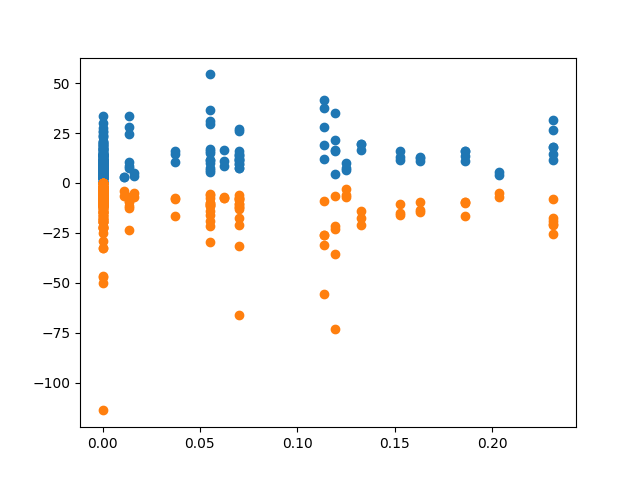

In [5]:
fig,ax = plt.subplots()
size = 500
ax.scatter(table[f"spore_density_{size}"],table['speed+'])
ax.scatter(table[f"spore_density_{size}"],table['speed-'])


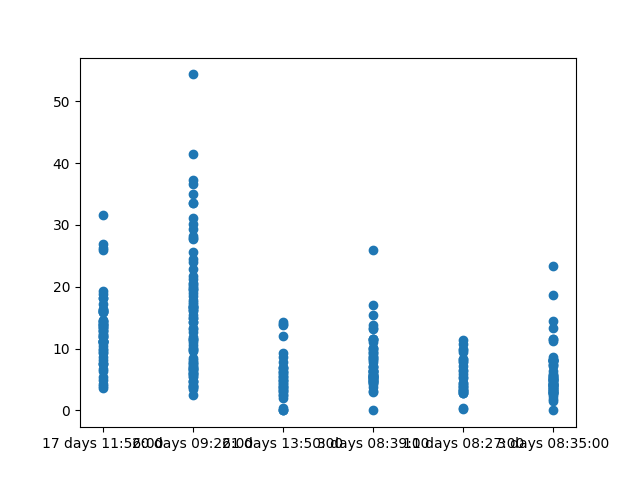

In [6]:
fig,ax = plt.subplots()
size = 500
ax.scatter(table[f"time_since_crossing"]/p,table['speed+'])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

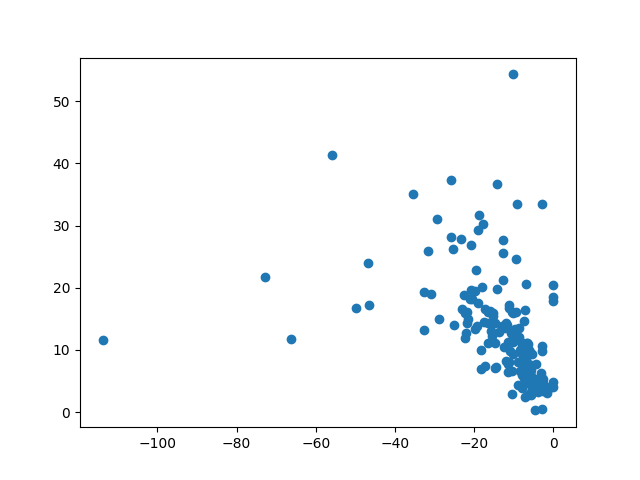

In [8]:
fig,ax = plt.subplots()
ax.scatter(table['speed-'],table['speed+'])
table['speed-group'] = table['speed-'].astype(int)

In [69]:
grouping_window_mult = 13
table['group_density'] = (table[f"spore_density_{size}"]*grouping_window_mult).astype(int)
speedp = table.groupby('group_density')['speed+'].median()
speedm = table.groupby('group_density')['speed-'].median()
speedp_error = table.groupby('group_density')['speed+'].std()
speedp_count = table.groupby('group_density')['speed+'].count()

speedm = table.groupby('group_density')['speed-'].median()
speedm_error = table.groupby('group_density')['speed-'].std()
speedm_count = table.groupby('group_density')['speed-'].count()

space_pixel_size = 1.725
speedp.index = speedp.index/grouping_window_mult/space_pixel_size**2

Text(0, 0.5, 'maximum speeds ($\\mu m.s^{-1}$)')

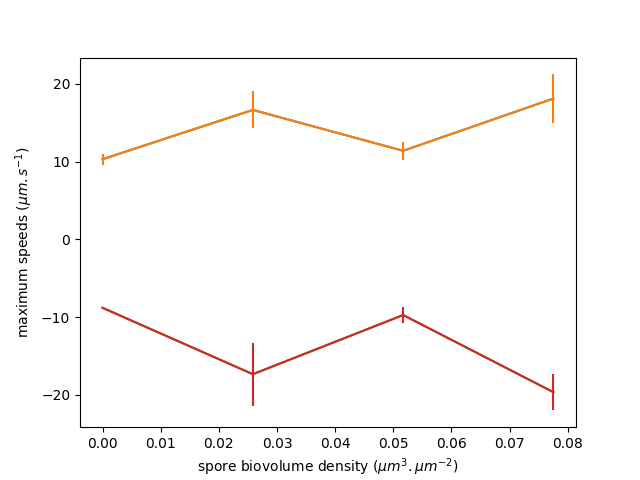

In [70]:
fig,ax = plt.subplots()
# ax.scatter(table["group_density"]/grouping_window_mult/space_pixel_size**2,table['speed-'])
ax.plot(speedp.index,speedp)
ax.errorbar(speedp.index,speedp,speedp_error/np.sqrt(speedp_count))
ax.plot(speedp.index,speedm)
ax.errorbar(speedp.index,speedm,speedm_error/np.sqrt(speedm_count))
ax.set_xlabel('spore biovolume density ($\mu m^{3}.\mu m^{-2}$)')
ax.set_ylabel('maximum speeds ($\mu m.s^{-1}$)')

